In [12]:
import numpy as np
from matplotlib import pyplot as plt
import keyboard
from matplotlib.animation import FuncAnimation
from scipy.optimize import minimize
from scipy.optimize import root

In [3]:
%matplotlib notebook

In [4]:
class game():
    def __init__(self, player, asteroids_count = 5, asteroid_speed = .02, size = (1, 1), asteroid_size = (.1,.2), boss_gate_size = .1, acceleration = .1, rotation_speed = 1, circle_detail = 20, safe_radius = .2, fps = 30, nofail = False):
        self.player = player
        self.pos = np.array([size[0] / 2, size[1] / 2])
        self.vel = np.array([0., 0.])
        self.ang = 0
        self.fps = fps
        self.size = size
        self.asteroids_pos = np.random.random((asteroids_count, 2)) @ [[size[0], 0], [0, size[1]]]       
        self.asteroids_vel = np.random.normal(0, asteroid_speed / np.sqrt(2), (asteroids_count, 2))
        self.asteroids_count = asteroids_count
        self.asteroid_sizes = asteroid_size[0] + (asteroid_size[1] - asteroid_size[0]) * np.random.uniform(size = asteroids_count)
        self.acceleration = acceleration
        self.rotation_speed = rotation_speed
        self.circle_detail = circle_detail
        self.t = 0
        self.gameover = False
        self.player.connect(self)
        self.nofail = nofail
        self.asteroid_plots = None

        for i in range(self.asteroids_count):
            x_pos = self.asteroids_pos[i][0]
            y_pos = self.asteroids_pos[i][1]
            while (self.pos[0] - x_pos)**2 + (self.pos[1] - y_pos)**2 < (safe_radius + self.asteroid_sizes[i])**2:
                self.asteroids_pos[i] = np.random.random(2) * [size[0], size[1]]
                x_pos = self.asteroids_pos[i][0]
                y_pos = self.asteroids_pos[i][1]
    
    def getAsteroidPos(self, t = None):
        if t is None:
            return self.astroids_pos
        else:
            return self.astroids_pos + self.astroids_vel * (t - self.t)
    
    def getAsteroidVel(self):
        return astroids_pos
    
    def getAstroidSizes(self):
        return asteroid_sizes
    
    def update(self):
        self.player.update()
        
        if self.gameover:
            return
        self.pos = self.pos + 1/self.fps * self.vel
        if self.player.get_forwards():
            self.vel = self.vel + self.acceleration * np.array([np.cos(self.ang), np.sin(self.ang)]) / self.fps
            
        if self.player.get_right():
            self.ang -= self.rotation_speed / self.fps
            
        if self.player.get_left():
            self.ang += self.rotation_speed /self.fps
            
        if self.pos[0] > 1:
            self.pos[0] -= 1
        if self.pos[0] < 0:
            self.pos[0] += 1
        if self.pos[1] > 1:
            self.pos[1] -= 1
        if self.pos[1] < 0:
            self.pos[1] += 1
            
        self.t += 1 / self.fps
        
        self.asteroids_pos = self.asteroids_pos + self.asteroids_vel / self.fps
        for i in range(self.asteroids_count):
            if self.asteroids_pos[i][0] > 1:
                self.asteroids_pos[i][0] -= 1
            if self.asteroids_pos[i][0] < 0:
                self.asteroids_pos[i][0] += 1
            if self.asteroids_pos[i][1] > 1:
                self.asteroids_pos[i][1] -= 1
            if self.asteroids_pos[i][1] < 0:
                self.asteroids_pos[i][1] += 1
        if not self.nofail and self.testCollision():
            self.gameover = True
          
    def testCollision(self):
        for i in range(self.asteroids_count):
            for x_repeat in -1, 0, 1:
                for y_repeat in -1, 0, 1:
                    x_pos = self.asteroids_pos[i][0] + x_repeat
                    y_pos = self.asteroids_pos[i][1] + y_repeat
                    if (self.pos[0] - x_pos)**2 + (self.pos[1] - y_pos)**2 < self.asteroid_sizes[i]**2:
                        return True
        return False
       
    def initframe(self, ax):
        self.asteroid_plots = dict()
        
        circle_linspace = np.linspace(0, 2 * np.pi, self.circle_detail)
        x_circle = np.cos(circle_linspace)
        y_circle = np.sin(circle_linspace)
        for i in range(self.asteroids_count):
            for x_repeat in -1, 0, 1:
                for y_repeat in -1, 0, 1:
                    x_pos = self.asteroids_pos[i][0] + x_repeat
                    y_pos = self.asteroids_pos[i][1] + y_repeat
                    self.asteroid_plots[i,x_repeat,y_repeat] = ax.plot(x_pos + self.asteroid_sizes[i] * x_circle, y_pos + self.asteroid_sizes[i] * y_circle, "b")[0]
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        
        self.ship_plot = ax.plot(*self.pos, "ko")[0]
        self.line_plot = ax.plot([self.pos[0], self.pos[0] + 2 * np.cos(self.ang)], [self.pos[1], self.pos[1] + 2 * np.sin(self.ang)], "r")[0]
    
    def updateframe(self, ax):
        ax.set_title("Time is %.2f" % self.t)
        circle_linspace = np.linspace(0, 2 * np.pi, self.circle_detail)
        x_circle = np.cos(circle_linspace)
        y_circle = np.sin(circle_linspace)
        for i in range(self.asteroids_count):
            for x_repeat in -1, 0, 1:
                for y_repeat in -1, 0, 1:
                    x_pos = self.asteroids_pos[i][0] + x_repeat
                    y_pos = self.asteroids_pos[i][1] + y_repeat
                    self.asteroid_plots[i,x_repeat,y_repeat].set_data([x_pos + self.asteroid_sizes[i] * x_circle, y_pos + self.asteroid_sizes[i] * y_circle])
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        
        self.ship_plot.set_data(*self.pos)
        self.line_plot.set_data([self.pos[0], self.pos[0] + 2 * np.cos(self.ang)], [self.pos[1], self.pos[1] + 2 * np.sin(self.ang)])
        
    def clone(self, player, nofail = True):
        new_game = game(player)
        new_game.player = player
        new_game.pos = self.pos.copy()
        new_game.vel = self.vel.copy()
        new_game.ang = self.ang
        new_game.fps = self.fps
        new_game.size = self.size
        new_game.asteroids_pos = self.asteroids_pos.copy()    
        new_game.asteroids_vel = self.asteroids_vel.copy()
        new_game.asteroids_count = self.asteroids_count
        new_game.asteroid_sizes = self.asteroid_sizes.copy()
        new_game.acceleration = self.acceleration
        new_game.rotation_speed = self.rotation_speed
        new_game.t = self.t
        new_game.gameover = self.gameover
        new_game.player.connect(new_game)
        new_game.nofail = nofail or self.nofail
        return new_game

In [5]:
class human_controller():
    def __init__(self):
        pass
    
    def connect(self, g):
        pass
    
    def update(self):
        pass
    
    def get_forwards(self):
        return keyboard.is_pressed('up') or keyboard.is_pressed('w')
    
    def get_right(self):
        return keyboard.is_pressed('right') or keyboard.is_pressed('d')
    
    def get_left(self):
        return keyboard.is_pressed('left') or keyboard.is_pressed('a')

In [26]:
class ai_controller():
    def simulate(self, p, framecount = 40):
        ai_controller(self.C, p)
        copy = self.g.clone(ai_controller(self.C, p), nofail = True)
        for _ in range(framecount):
            copy.update()
        return copy.player.p, copy.player.x
    
    def __init__(self, C, p = None, reinitfreq = 20):
        self.g = None
        self.x = None
        self.C = C
        
        self.forwards = False
        self.rotate_right = False
        self.p = p
        if p is None:
            self.reinitfreq = reinitfreq
        else:
            self.reinitfreq = None
        self.timesteps = 0
    
    def connect(self, g):
        self.g = g
        self.x = np.array([*g.pos, *g.vel, g.ang])
        self.get_forwards()
        self.get_right()
        self.get_left()
        self.t = self.g.t
        
        self.forwards = False
        self.rotate_right = False
        
        if self.p is None:
            self.chooseP()
    
    def chooseP(self):
        self.p = root(lambda x: self.simulate(x)[0], np.ones(5)).x
        print(self.p)
        print(self.simulate(self.p)[0])
    
    def update(self):
        self.timesteps += 1
        if not self.reinitfreq is None and self.timesteps % self.reinitfreq == 0:
            self.chooseP()
        
        self.forwards = self.p[2] * np.cos(self.x[4]) + self.p[3] * np.cos(self.x[4]) > 0
        self.rotate_right = self.p[4] > 0
        new_t = g.t
        
        p_x_der = 0
        p_y_der = 0
        
        
        for i in range(self.g.asteroids_count):
            for x_offset in [-1, 0, 1]:
                for y_offset in [-1, 0, 1]:
                    x_dist = self.x[0] - self.g.asteroids_pos[i][0] - x_offset
                    y_dist = self.x[1] - self.g.asteroids_pos[i][1] - y_offset
                    p_x_der -= 2 * self.C * x_dist / (x_dist**2 + y_dist**2 - self.g.asteroid_sizes[i])**2
                    p_y_der -= 2 * self.C * y_dist / (x_dist**2 + y_dist**2 - self.g.asteroid_sizes[i])**2
                    
        if self.forwards:
            rotate_reward_change = (self.p[2] * np.sin(self.x[4]) - self.p[3] * np.cos(self.x[4])) * g.acceleration
        else:
            rotate_reward_change = 0
        
        self.p = self.p + (new_t - self.t) * np.array([p_x_der, p_y_der, -self.p[0], -self.p[1], rotate_reward_change])
        self.x = np.array([*self.g.pos, *self.g.vel, self.g.ang])
        
    def get_forwards(self):
        return self.forwards
    
    def get_right(self):
        return self.rotate_right
    
    def get_left(self):
        return not self.rotate_right

[ 2.59630748e+00  8.50685810e-01 -1.02067930e+03  2.78333642e+01
  9.97812115e-01]
[ 2.52640047e+04 -4.00156858e+03 -8.22263065e+06  3.18055162e+06
  9.97812115e-01]


<IPython.core.display.Javascript object>


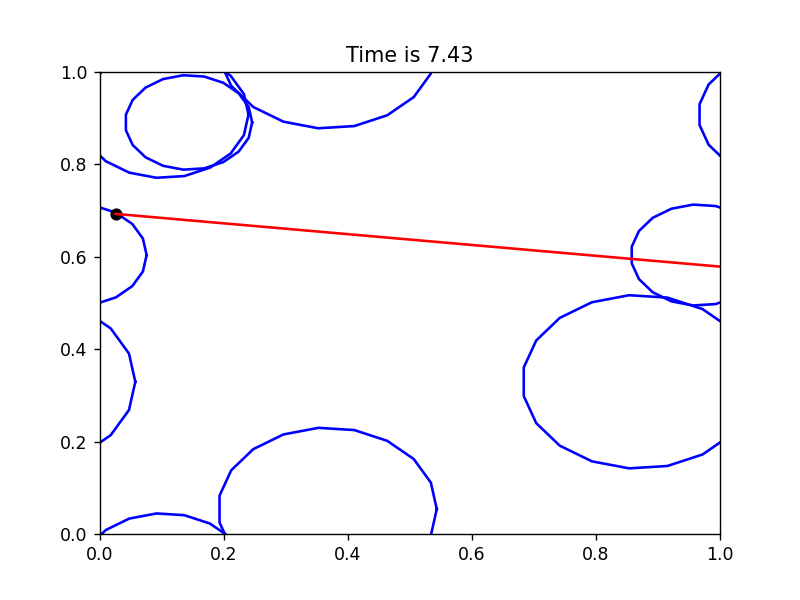

In [30]:
g = game(ai_controller(1), nofail = False, fps = 30)

fig = plt.figure()
ax = plt.subplot()
g.initframe(ax)
g.update()
def update(i):
    g.update()
    g.updateframe(ax)
anim = FuncAnimation(fig, update, frames = [0], interval = 1 / g.fps, repeat = True)
plt.show()

<IPython.core.display.Javascript object>


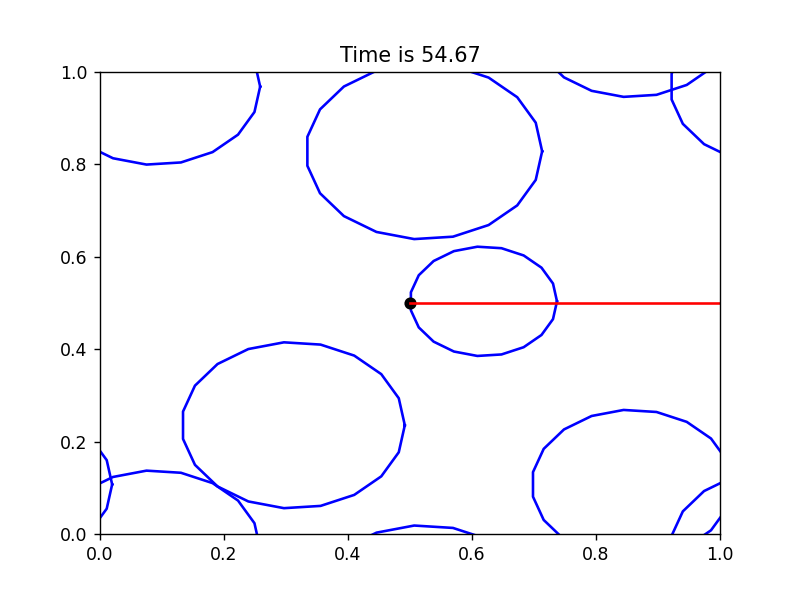

In [20]:
fig = plt.figure()
ax = plt.subplot()
g = game(human_controller(), fps = 30)
g.initframe(ax)
def update(i):
    g.update()
    g.updateframe(ax)
anim = FuncAnimation(fig, update, frames = [0], interval = 1 / g.fps, repeat = True)
plt.show()

In [10]:
g.copy()

AttributeError: 'game' object has no attribute 'copy'